# CB 4. Stat 4770/7770. Q2 Fall 2024

## Introduction

* In this coding brick you will download and analyze a data set, fitting both statistical regression models and machine learning models.
* The Module 7 and 8 notes contain examples of fitting all these sorts of models, so if you get stuck they will make a good reference point.
* The data set is the credit scoring dataset called PRSM. If you want to learn more about the background business problem and see a list of all the variables, there is a document on Canvas in the homework folder called "PRSM_intro_4770_7707.pdf".
* If you have multiple Axes level plots in a cell, then putting the command plt.show() after each one will make sure that they are all printed.

## Q1. Read in and review the data structure
### 4 pts.

* The data file to download is called "PRSM_data".

a. Download the the data from the Canvas "csv" folder, to your computer and then into a pandas DataFrame. Call the data frame "prsm_data". Use the column called "CaseNumber" as the row index variable.

b. Use the .info() method to summarize and print the data frame structure.

In [2]:
import numpy as np
np.set_printoptions(precision=6)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# Change and uncomment this filepath to the location where you downloaded the data set.
os.chdir('/Users/vidursaigal/Documents/Documents - Vidur’s MacBook Pro/Github Repos/STAT4770-Homework')

#1a. (2pts.)
prsm_data = pd.read_csv('PRSM_data.csv', index_col="CaseNumber")

#1b. (2pts.)
prsm_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 297918523 to 95627938
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   PRSM                                     999 non-null    float64
 1   Amt.Repaid.at.6.Months                   999 non-null    int64  
 2   Nominal.Loan.Amount                      999 non-null    float64
 3   Total.Amt.to.be.Repaid                   999 non-null    float64
 4   Repayment.Percentage                     999 non-null    float64
 5   Commission.Upfront                       999 non-null    float64
 6   Validated.Monthly.Batch                  999 non-null    float64
 7   Historical.Monthly.Credit.Card.Receipts  999 non-null    float64
 8   Months.of.History                        999 non-null    int64  
 9   Loan.Type                                999 non-null    object 
 10  FICO                                     9

## Q2. Plot the distribution of PRSM score
### 6 pts.

a. Using the seaborn library, plot the distribution of the PRSM variable, using a histogram and KDE. 

b. Create a box plot of the PRSM variable.

c. From parts a and b, describe any anomalies that you see in the distribution of PRSM, remembering that PRSM is a measure of how much of the loan has been repaid and would expected to be above 0.


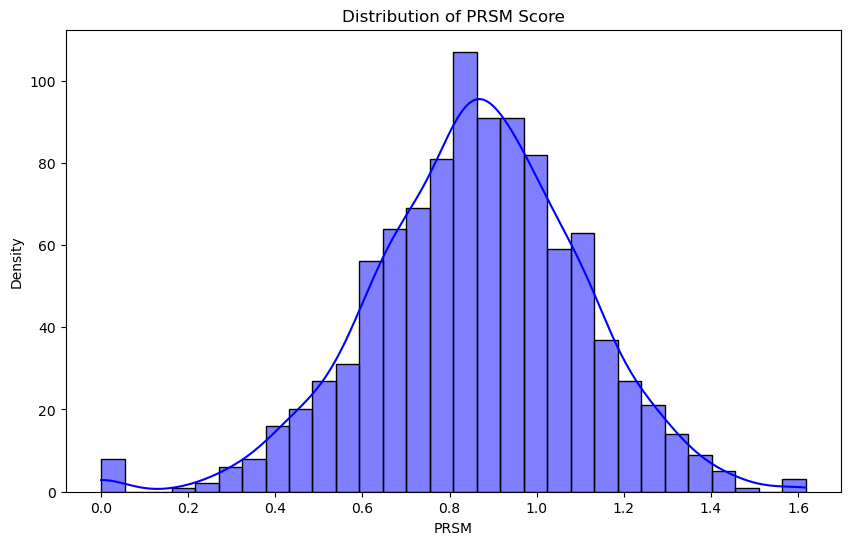

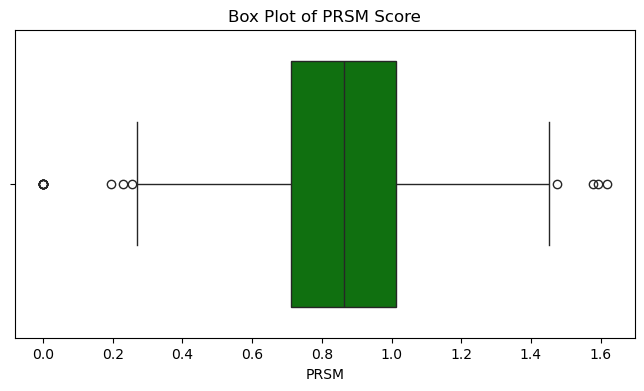

In [3]:
#2a. (2pts.)
plt.figure(figsize=(10, 6))
sns.histplot(prsm_data['PRSM'], kde=True, bins=30, color='blue')
plt.title('Distribution of PRSM Score')
plt.xlabel('PRSM')
plt.ylabel('Density')
plt.show()

#2b. (2pts.)
plt.figure(figsize=(8, 4))
sns.boxplot(x=prsm_data['PRSM'], color='green')
plt.title('Box Plot of PRSM Score')
plt.xlabel('PRSM')
plt.show()

#2c. (2pts.) 
# From the histogram and KDE (part a) and the box plot (part b), the following anomalies are observed:
# - There are a few outliers on the lower end near 0, which may represent loans with minimal or no repayment.
# - Outliers on the higher end (above 1.4) are unexpected since PRSM measures loan repayment
#   and values above 1 might indicate over-repayment or erroneous data entries.
# - The majority of the data is concentrated between 0.7 and 0.9, which seems plausible for loan repayment progress.
# - Further inspection is recommended for the outliers to confirm their validity or address potential errors in the dataset.

## Q3 Explore the relationship between PRSM score and FICO score
### 5 pts.

a. Using seaborn's regplot, plot a simple regression of PRSM against FICO.

b. Using seaborn's relplot, make a color coded scatterplot of PRSM score and FICO score, colored (hue) by Loan.Type.

c. Finally using 'lmplot' show a regression line for each level of LoanType (still using PRSM against FICO).  
 
d. Comment on which of the three models, one line fits all, parallel lines or interaction seems more suitable to use as a model based on your graphs.  

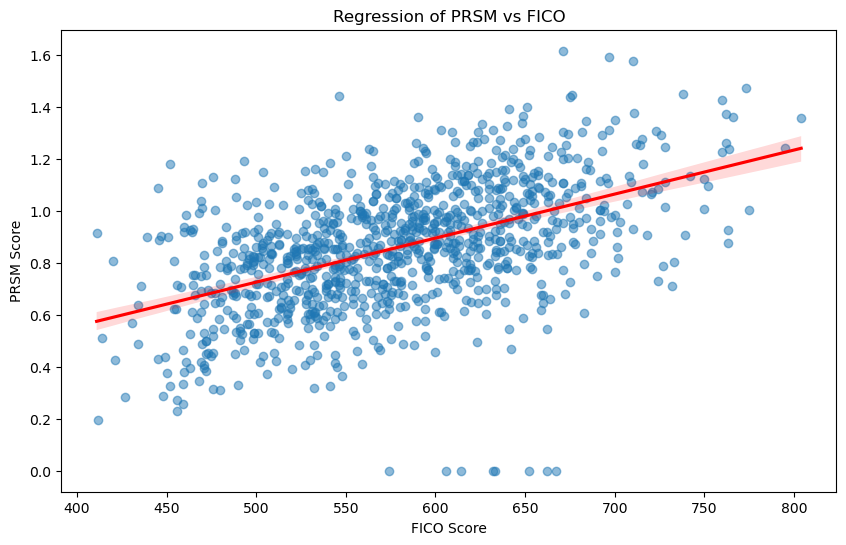

<Figure size 1000x600 with 0 Axes>

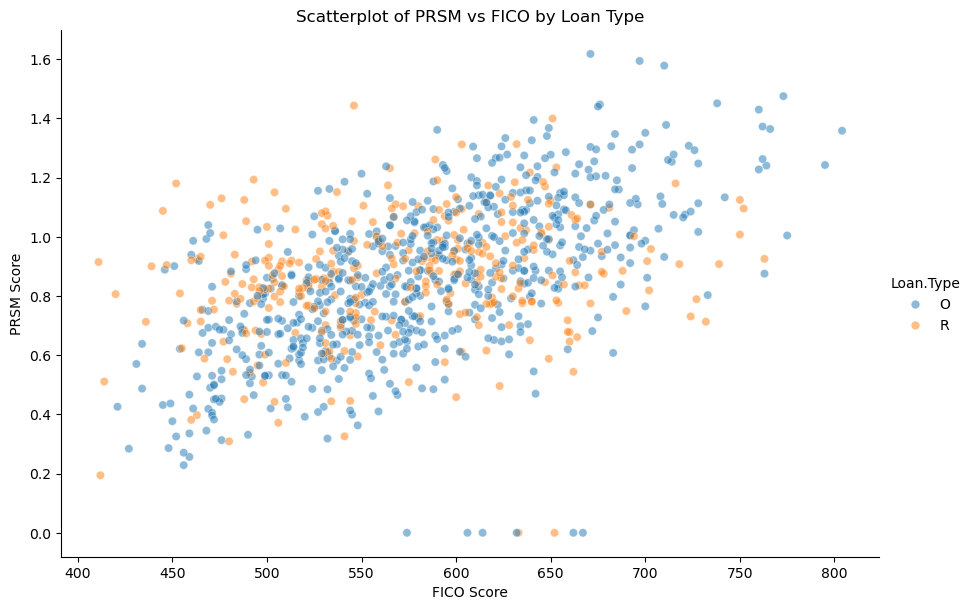

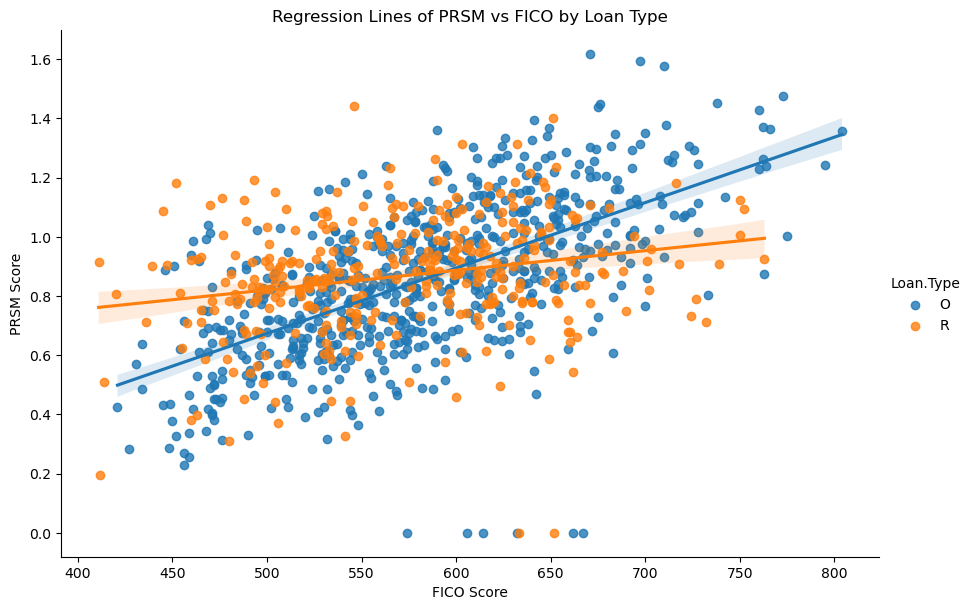

In [11]:
# Q3 code goes here

#3a. (1pt.)
plt.figure(figsize=(10, 6))
sns.regplot(x='FICO', y='PRSM', data=prsm_data, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Regression of PRSM vs FICO')
plt.xlabel('FICO Score')
plt.ylabel('PRSM Score')
plt.show()

#3b. (1pt.)
plt.figure(figsize=(10, 6))
sns.relplot(x='FICO', y='PRSM', hue='Loan.Type', data=prsm_data, kind='scatter', alpha=0.5, height=6, aspect=1.5)
plt.title('Scatterplot of PRSM vs FICO by Loan Type')
plt.xlabel('FICO Score')
plt.ylabel('PRSM Score')
plt.show()

#3c. (2pts.)
sns.lmplot(x='FICO', y='PRSM', hue='Loan.Type', data=prsm_data, height=6, aspect=1.5)
plt.title('Regression Lines of PRSM vs FICO by Loan Type')
plt.xlabel('FICO Score')
plt.ylabel('PRSM Score')
plt.show()

#3d. (1pt.) Your comment here. 
# - The simple regression plot (3a) suggests a positive relationship between PRSM and FICO,
#   but it oversimplifies the relationship by assuming a single trend for all data points.
# - The scatterplot (3b) highlights variation in PRSM and FICO by Loan.Type, with some clear
#   distinctions in the distribution of points between the two loan types.
# - The regression plot for each Loan.Type (3c) reveals that the relationship between PRSM and FICO
#   differs for the two Loan.Type categories:
#   - Loan.Type "O" has a stronger positive relationship between PRSM and FICO compared to Loan.Type "R".
#   - This indicates that an interaction model (where slopes are different for Loan.Type categories)
#     may be the most suitable for capturing these differences.
# - Overall, the interaction model appears more appropriate than the single-line or parallel-lines model
#   based on the observed differences in slopes for each Loan.Type.


## Q4 Fit a simple regression model to the data.
### 8 pts.

a. Using the stats models library, fit a simple regression of PRSM v. FICO and print its summary output.

b. Interpret the R-squared value.

c. For two loans whose FICO score differs by 50, what does the model predict their *difference* in PRSM score will be? Do this calculation using Python and not "by hand". You can extract the  model coefficients from the fitted regression object using the ".params" attribute. 

d. Based on the p-value of the FICO score, does it appear that this variable is an important predictor of PRSM? Explain your reasoning.

e. Create a data frame for prediction (call it Xnew) that has a single column named "FICO" and two values, 650 and 700. Print the data frame.

f. Using the .predict method, predict and print the PRSM score for these two loans.

g. There is an attribute in the regression output called "mse_resid", the mean squared error. If you called your fitted model olsres1, then you get the MSE with the command 'olsres1.mse_resid'. Use Python to calculate the ***ROOT*** MSE.

h. Approximately how wide (the distance from the center to the edge) would a 95% prediction interval be for the predictions you made in part 4f? This is called the "margin of error" for the predictions.



In [ ]:
import statsmodels.formula.api as smf
import math

#Q4a. (1pt.)
olsres1 = smf.ols('PRSM ~ FICO', data=prsm_data).fit()
print(olsres1.summary())

#Q4b. (1pt.) Your answer here. 
# The R-squared value is 0.252, which indicates that approximately 25.2% of the variation in PRSM
# is explained by the FICO score. While this suggests a moderate relationship, the remaining 74.8%
# of the variation is due to other factors not included in the model.

#Q4c. (1pt.)
coefficients = olsres1.params
fico_difference = 50
prsm_difference = coefficients['FICO'] * fico_difference
print(f'Predicted difference in PRSM for a 50-point FICO difference: {prsm_difference}')

#Q4d. (1pt.) Your answer here. 
# The p-value for the FICO coefficient is 0.000, which is well below the standard threshold of 0.05.
# This indicates that FICO is a statistically significant predictor of PRSM.
# Therefore, FICO score plays an important role in explaining variations in PRSM.

#Q4e. (1pt.)
Xnew = pd.DataFrame({'FICO': [650, 700]})
print(Xnew)

#Q4f. (1pt.)
predictions = olsres1.predict(Xnew)
print(f'Predicted PRSM scores for FICO 650 and 700: {predictions.tolist()}')

#Q4g. (1pt.)
rmse = math.sqrt(olsres1.mse_resid)
print(f'Root Mean Squared Error (RMSE): {rmse}')

#Q4h. (1pt.)
margin_of_error = 1.96 * rmse
print(f'Margin of error for a 95% prediction interval: {margin_of_error}')


                            OLS Regression Results                            
Dep. Variable:                   PRSM   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     336.8
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           4.98e-65
Time:                        14:29:20   Log-Likelihood:                 150.78
No. Observations:                 999   AIC:                            -297.6
Df Residuals:                     997   BIC:                            -287.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1216      0.054     -2.256      0.0

## Q5 Fit the interaction model to the data.

### 4 pts.

a. Fit the model that includes the variables FICO, Loan.Type and the ***interaction*** between FICO and Loan.Type. Print the model summary. There is a nuance here, in that because the variable 'Loan.Type' name contains a period, Python thinks that it should look for variable named "Loan" that has an attribute called "Type". This will cause an error! The way to fix this problem is to use a special notation in the formula where you write Q("Loan.Type") instead of just Loan.Type.

b. Based on your fitted model, which Loan.Type, Original or Repeat, is the most sensitive to FICO score, in terms of performance? That is, which of the loan types has the largest slope?

c. Is the difference in slopes statistically significant? Justify your answer.


In [14]:
#Q5a. (2pts.)
interaction_model = smf.ols('PRSM ~ FICO * Q("Loan.Type")', data=prsm_data).fit()
print(interaction_model.summary())
#Q5b. (1pt.)  
# To determine which Loan.Type is the most sensitive to FICO score:
# - For Loan.Type "Original" (baseline), the slope is the coefficient of FICO: 0.0022.
# - For Loan.Type "Repeat", the slope is the sum of the FICO coefficient (0.0022) and the interaction coefficient (-0.0015):
#   Slope for "Repeat" = 0.0022 - 0.0015 = 0.0007.
# Thus, the "Original" Loan.Type is more sensitive to FICO, as it has a larger slope.


#Q5c. (1pt.)  
# The p-value for the interaction term (FICO:Loan.Type[T.R]) is 0.000, which is highly significant.
# This indicates that the difference in slopes between the two Loan.Type categories is statistically significant.
# Therefore, the effect of FICO on PRSM differs significantly between "Original" and "Repeat" loan types.


                            OLS Regression Results                            
Dep. Variable:                   PRSM   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     143.4
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           3.29e-77
Time:                        14:34:22   Log-Likelihood:                 184.88
No. Observations:                 999   AIC:                            -361.8
Df Residuals:                     995   BIC:                            -342.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## Q6. Building a simple tree model
### 6 pts.

The following questions involve building a decision tree for the PRSM score. Here are the variables that are to be used as potential predictors:

`
 ['Repayment.Percentage',
  'Commission.Upfront', 'Validated.Monthly.Batch',
  'Loan.Type', 'FICO',  'Years.In.Business', 'Satisfied.Accounts',
  'Previous.Delinquent.Credit.Lines',
  'Business.Entity.Type','Num.of.Legal.Items','Population.in.Zip.Code',
  'Average.House.Value.in.Zip.Code', 'Income.Per.Household.in.Zip....',
  'Median.Age.in.Zip.Code',
  'Employment.in.Zip.Code',
  'ISO.Name']   
`

Of these, all are continuous except 'Loan.Type', 'Business.Entity.Type' and 'ISO.Name'.

a. Create a new version of the data frame that just has the continuous variables in it. Call it 'Xcts'. 

b. Create a new version of the data frame that just has the categorical predictor variables in it. Call it "Xcat".

c. Binarize the categorical variables using the pandas get_dummies function (there is no need to use the 'drop_first=True' argument here).

d. Build a final prediction data frame by merging the continuous and binarized categorical variables on their index. Call the combined data simply "X". Obtain the dimensions of X from the .shape attribute and print them.  

e. Print the top 5 rows of the X data frame.

f. Extract the PRSM score from the prsm_data, and save it into a variable called y. Once again print the first 5 entries in the y-variable.

In [15]:
#6a. (1pt.)
continuous_vars = ['Repayment.Percentage', 'Commission.Upfront', 'Validated.Monthly.Batch',
                   'FICO', 'Years.In.Business', 'Satisfied.Accounts',
                   'Previous.Delinquent.Credit.Lines', 'Num.of.Legal.Items',
                   'Population.in.Zip.Code', 'Average.House.Value.in.Zip.Code',
                   'Income.Per.Household.in.Zip....', 'Median.Age.in.Zip.Code',
                   'Employment.in.Zip.Code']
Xcts = prsm_data[continuous_vars]
print("Xcts created with shape:", Xcts.shape)

#6b. (1pt.)
categorical_vars = ['Loan.Type', 'Business.Entity.Type', 'ISO.Name']
Xcat = prsm_data[categorical_vars]
print("Xcat created with shape:", Xcat.shape)

#6c. (1pt.)
Xcat_binarized = pd.get_dummies(Xcat)
print("Xcat binarized with shape:", Xcat_binarized.shape)

#6d. (1pt.)
X = pd.concat([Xcts, Xcat_binarized], axis=1)
print("Combined data frame X created with shape:", X.shape)

#6e. (1pt.)
print("Top 5 rows of X:")
print(X.head())

#6f. (1pt.) 
y = prsm_data['PRSM']
print("First 5 entries in y:")
print(y.head())

Xcts created with shape: (999, 13)
Xcat created with shape: (999, 3)
Xcat binarized with shape: (999, 14)
Combined data frame X created with shape: (999, 27)
Top 5 rows of X:
            Repayment.Percentage  Commission.Upfront  Validated.Monthly.Batch  \
CaseNumber                                                                      
297918523                   12.5              445.50                  4950.42   
122814276                   12.5             4360.50                 30727.60   
119013724                   12.5              480.00                 38572.80   
8919634                     12.5              821.22                  6008.54   
418918097                   12.5              128.00                  9956.48   

            FICO  Years.In.Business  Satisfied.Accounts  \
CaseNumber                                                
297918523    574                2.0                   5   
122814276    642               15.0                  11   
119013724    623     

## Q7. Split the data into training and test data sets
### 4 pts.

a. Use the sklearn function 'train_test_split' to split the data into training and test sets. Use 40% of the data for the test data and use a random number seed of 1940 for the random_state parameter in your call to 'train_test_split'. Print the dimensions of both the training and test data frames for the X variable.

In [16]:
from sklearn.model_selection import train_test_split

#7a. (4pts.)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1940)
print(f"Training set dimensions (X_train): {X_train.shape}")
print(f"Test set dimensions (X_test): {X_test.shape}")

Training set dimensions (X_train): (599, 27)
Test set dimensions (X_test): (400, 27)


## Q8. Create a simple tree
### 6 pts.

a. Using the training data, use the DecisionTreeRegressor class to build a simple tree with just 6 terminal/leaf nodes. You set the leaf node count with the 'max_leaf_nodes' parameter.

b. Print the visual representation of the tree.

c. By reviewing your tree, and with respect to Question 2c where you identified an anomaly in the PRSM scores, characterize the anomaly in terms of the X variables.

d. Using the tree, articulate the values of the X-variables associated with the best performing loans.

In [9]:
from sklearn import tree
import sklearn

#Q8a. (1pt.)

#Q8b. (1pt.)

#Q8c. (2pts)  Your answer here.

#Q8d. (2pts.)  Your answer here.


## Q9. Build a tree using cost complexity pruning
### 7 pts.

In this question you can use the code from the Module 8 notes as a guide. The key is to identify the relevant pieces of code to get the job done.

a. Set up a decision tree regressor and create its cost complexity pruning path. Save the alphas and impurities into variables.

b. Write a for loop that iterates over the alphas, creating a new tree for each value of alpha, that is then saved (append) into a list that is called rgrs.

c. Use the 'score' method to obtain the "scores" for both the training and test data sets. Save the scores into variables called 'train_scores' and 'test_scores'.

d. Find and print the index at which the maximum of the *test* scores appears (use the .idxmax() method).

e. Print out the test score (which is just the R-squared) for the best tree.







In [10]:
#9a. (2pts.)

#9b. (2pts.)

#9c. (1pt.)   

#9d. (1pt.)

#9e. (1pt.)
